<a href="https://colab.research.google.com/github/quangduong191/BTAI/blob/main/Phan_biet_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tran Quang Duong 19146163
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation ='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Tien'

/content/drive/MyDrive/Colab Notebooks/Tien


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Tien/Training_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 642 images belonging to 11 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Tien/Test_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 283 images belonging to 11 classes.


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_set,epochs = 30,validation_data=test_set,verbose = 1)

Epoch 1/30
21/21 [==============================] - 283s 14s/step - loss: 2.6073 - accuracy: 0.1293 - val_loss: 2.4932 - val_accuracy: 0.1131
Epoch 2/30
21/21 [==============================] - 61s 3s/step - loss: 2.2901 - accuracy: 0.2025 - val_loss: 2.1860 - val_accuracy: 0.2615
Epoch 3/30
21/21 [==============================] - 60s 3s/step - loss: 1.7261 - accuracy: 0.3738 - val_loss: 1.3427 - val_accuracy: 0.5018
Epoch 4/30
21/21 [==============================] - 60s 3s/step - loss: 1.1535 - accuracy: 0.5810 - val_loss: 1.2295 - val_accuracy: 0.5512
Epoch 5/30
21/21 [==============================] - 60s 3s/step - loss: 0.9146 - accuracy: 0.6573 - val_loss: 1.0024 - val_accuracy: 0.6078
Epoch 6/30
21/21 [==============================] - 60s 3s/step - loss: 0.6801 - accuracy: 0.7632 - val_loss: 1.0887 - val_accuracy: 0.6184
Epoch 7/30
21/21 [==============================] - 60s 3s/step - loss: 0.7177 - accuracy: 0.7321 - val_loss: 0.9110 - val_accuracy: 0.7067
Epoch 8/30
21/21 [

In [ ]:
training_set.class_indices

{'1 ngàn': 0,
 '10 ngàn': 1,
 '100 ngàn': 2,
 '100 đồng': 3,
 '2 ngàn': 4,
 '20 ngàn': 5,
 '200 ngàn': 6,
 '5 ngàn': 7,
 '50 ngàn': 8,
 '500 ngàn': 9,
 '500 đồng': 10}

In [ ]:
from keras.models import load_model
model.save('Final.h5')
model_CNN = load_model('Final.h5')

array([9])

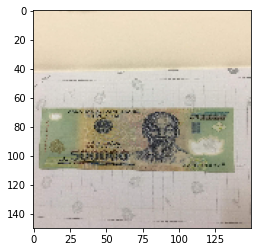

In [ ]:
img = load_img('/content/z3430622630730_4d856126ead3baa45cab6f416244cd95.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([5])

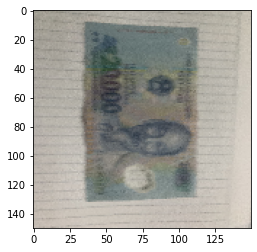

In [ ]:
img = load_img('/content/z3430613926492_2e0aa3ef3c943560f5a4348de8d860b5.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

array([2])

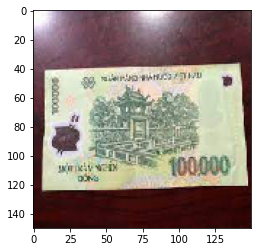

In [ ]:
img = load_img('/content/100k.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Phan_biet_tien.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-21 05:55:36--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0.001s  

2022-05-21 05:55:36 (2.18 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Phan_biet_tien.ipynb to pdf
[NbConvertApp] Support files will be in Phan_biet_tien_files/
[NbConvertApp] Making directory ./Phan_biet_tien_files
[NbConvertApp] Making directory 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'